In [32]:
push!(LOAD_PATH, pwd()*"/..")
import_path = "/Users/julian/Harvard/research/nowak/indirect_rec/src"
push!(LOAD_PATH, import_path)
using LightGraphs, Epidemics, GraphGeneration,IM
using NLsolve
using PyPlot, Distributions
using DegreeDistribution
using StatsBase
using GraphCreation
 using GraphClustering
 using DataAnalysis
using TwoLevelGraphs
using GraphPlotting,GraphPlot

In [99]:
N = 60
k = 6
sigma_k = 8
min_degree = 3
R = random_regular_graph(N,k)
# K = create_graph(N,k,:watts_strogatz,C,deg_distr=d)
# G = graph_from_gamma_distribution(N,k,sigma_k,min_degree)
# GC = regular_clustering_graph(N,k,C)
# R = LightGraphs.random_regular_graph(N,k)
m = 12 #0.5: m=14,l=9,r=1 $ 0.3: m = 10, l = 7, r = 3
l = 5
r = k -l
t = TwoLevel(Int(ceil(N/m)*m),m,l,r)
# l = 9
# m = 20
# t = TwoLevel(N,m,l,k-r)
println(t.N)
T = generate_regular_two_level_graph(t)

60


{60, 180} undirected simple Int64 graph

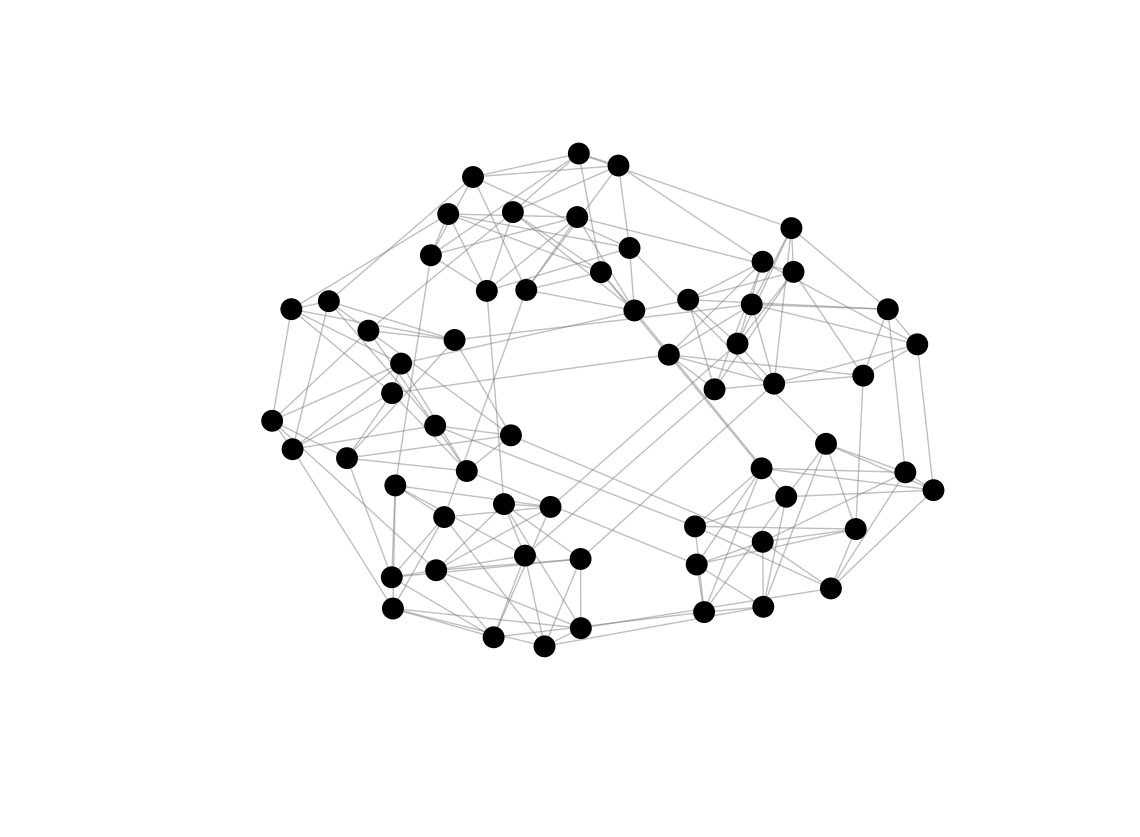

(-1.5, 1.5, -1.5, 1.5)

In [100]:
lw = 0.5
edge_alpha = 0.5
my_layout(x) = spring_layout(x,C=1,MAXITER=1000)
figure(dpi=200)
plot_graph(T,N,node_color="black",edge_alpha = edge_alpha,lw = lw,layout_fn=my_layout)

In [39]:
import Base.isless,Base.isequal,Base.==
function isless(e1::Edge,e2::Edge)
    isless(edge_to_tuple(e1),edge_to_tuple(e2))
end

function isequal(e1::Edge,e2::Edge)
    isequal(edge_to_tuple(e1),edge_to_tuple(e2))
end

function ==(e1::Edge,e2::Edge)
    ==(edge_to_tuple(e1),edge_to_tuple(e2))
end


function edge_to_tuple(e::Edge)
    if e.src < e.dst
        return (e.src,e.dst)
    else
        return (e.dst,e.src)
    end
end

edge_to_tuple (generic function with 1 method)

In [41]:
Edge(2,1) == Edge(1,2)


true